# Task 1

In [8]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, KFold, GridSearchCV
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('sp500.csv',index_col=0)
df.head(2)

,SP500,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,...,WMB,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
0,1676.12,104.8617,30.0317,38.7049,64.8930,16.0295,94.7727,50.82,3.86,81.2615,...,27.0806,139.1379,22.8062,23.7407,41.0246,26.1189,46.4083,79.8048,25.8329,30.7332
1,1655.45,103.5100,29.5924,37.3865,63.7629,15.8936,93.2675,49.58,3.72,80.5379,...,26.7222,137.5369,23.1504,23.1472,40.3263,25.5592,46.5642,79.9583,25.7091,30.3482


#### 1. Start by finding out which stocks of the 387 are most correlated with the S&P index value. For the prediction task, you should use the stocks with (correlation ≥ 0.95 or correlation ≤ -0.95).

In [11]:
corr = df.corr()['SP500'].abs() >= 0.95 
cols = corr[(corr >= 0.95)].drop('SP500')
colNames = cols.index
print(colNames)
print(colNames.size)
# there are 71 companies whose products are most correlated with the S&P index

Index(['ACN', 'ATVI', 'ADBE', 'AET', 'AFL', 'A', 'ALL', 'AMT', 'APH', 'ADI',
       'ANTM', 'AON', 'AAPL', 'AJG', 'ADSK', 'ADP', 'BK', 'BAX', 'BBT', 'BDX',
       'BRK.B', 'BLK', 'CDNS', 'CTAS', 'CSCO', 'CTXS', 'CME', 'CSX', 'ECL',
       'EXPD', 'FDX', 'HRS', 'IQV', 'JBHT', 'JPM', 'KLAC', 'LLL', 'LH', 'LRCX',
       'LMT', 'MAR', 'MMC', 'MA', 'MSFT', 'NEE', 'NTRS', 'PGR', 'PLD', 'RJF',
       'RTN', 'RSG', 'COL', 'ROP', 'SHW', 'SPGI', 'SYK', 'STI', 'SNPS', 'TEL',
       'TXN', 'TMO', 'TMK', 'TSS', 'TDG', 'UNH', 'V', 'WM', 'WAT', 'XYL',
       'YUM', 'ZTS'],
      dtype='object')
71


#### 2. For the training, divide the dataset into training, testing and validation sets. Indicate the ratios you use for the division.

##### Normalise the dataset

In [4]:
dfn = (df - df.mean()) / df.std()

x = np.array(dfn[colNames])
y = np.array(dfn['SP500'])

###### Divide the dataset into training, testing and validation sets

In [5]:
# Testing set is 20% of the whole data set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# Validation set is 20% of the training set 
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)


##### Un-normalized dataset for plotting


In [6]:
df = pd.read_csv('sp500.csv',index_col=0)
x = np.array(df[colNames])
y = np.array(df['SP500'])

un_norm_x_train, un_norm_x_test, un_norm_y_train, un_norm_y_test = train_test_split(x, y, test_size=0.2, random_state=1)
df.head(2)
y_mean = y.mean()
y_std = y.std()


#### 3. Indicate the scoring metric suitable for the task. 

###### use the mean_squared_error scoring matrix  (most suitable for regression model)

In [11]:
clf = MLPRegressor()
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

[0.02894991 0.00666455 0.00707095]


#### 4. Train the neural network with both the sgd and adam optimizers. Attempt different values for the learning rate with each optimizer to achieve the best result.

###### train with SGD at learning rate = 0.0001

In [12]:
clf = MLPRegressor( max_iter=500, solver='sgd' , learning_rate_init=0.0001)
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)

# mean square error values are quite high at both training and testing phases and it could be better

[0.05169999 0.034564   0.07086672]


0.030593367808550397

###### train with SGD at learning rate = 0.001

In [41]:
clf = MLPRegressor( max_iter=500, solver='sgd' , learning_rate_init=0.001)
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)

# mean square error values are decrasing by increasing the learning rate to 0.001, resulting in better performance.

[0.01952043 0.1749998  0.04319444]


0.019426090486214822

###### train with SGD at learning rate = 0.01

In [42]:
clf = MLPRegressor( max_iter=500, solver='sgd' , learning_rate_init=0.01)
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)

# mean square error values are now very small after increasing the learning rate to 0.01,
#indicating the best performance sofar

[0.00624488 0.00614535 0.00576618]


0.0060608849287405045

###### train with Adam at learning rate = 0.0001

In [43]:
clf = MLPRegressor( max_iter=500 , solver='adam', learning_rate_init=0.0001)
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)

# results after using adam optimizer at learning rate = 0.0001 are a little bit better than 
# the results produced using sgd at learning rate = 0.001 especially at the testing phase

[0.01822568 0.01291109 0.02298443]


0.02142735611311774

###### train with Adams at learning rate = 0.001

In [44]:
clf = MLPRegressor( max_iter=500 , solver='adam', learning_rate_init=0.001)
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)

# performance here is getting better by increasing the learning rate to 0.001

[0.01053652 0.00635826 0.00500393]


0.00734532266420963

###### train with Adams at learning rate = 0.01

In [50]:
clf = MLPRegressor( max_iter=500 , solver='adam', learning_rate_init=0.01)
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)

# using adam optimizer at learning rate = 0.01 has the best performance so far
# because it results in the least mean square error values.

[0.00729983 0.00723043 0.00503021]


0.004475934028718002

###### testing our conclusion for the best learning rate value using grid search

In [51]:
param_grid = {'learning_rate_init' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]}

gs = GridSearchCV(clf, param_grid=param_grid)
gs.fit(X_train, Y_train)
gs.best_params_

{'learning_rate_init': 0.01}

###### testing our conclusion for the best optimizer using grid search at learning rate 0.01

In [24]:
param_grid = {'learning_rate_init': [0.01], 'solver' : ['sgd' , 'adam']}

gs = GridSearchCV(clf, param_grid=param_grid)
gs.fit(X_train, Y_train)
gs.best_params_

{'learning_rate_init': 0.01, 'solver': 'adam'}

#### 5. Indicate which regularization technique you use to avoid overfitting.

###### Investigation Early stopping effect

In [102]:
clf = MLPRegressor( max_iter=500 , solver='adam', learning_rate_init=0.01, early_stopping=True )
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)
# perforamce is almost the same after enabling early stopping !

[0.02778342 0.0533647  0.44499792]


0.005371108911890875

###### Investigation Early stopping effect with alpha = 0.001

In [150]:
clf = MLPRegressor(alpha=0.001,  max_iter=500 , solver='adam', learning_rate_init=0.01, early_stopping=True )
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)
# performance has slightly changed to be better after setting alpha to 0.001

[0.03935516 0.00404541 0.00476973]


0.0030483717626122665

###### Investigation Early stopping effect with alpha = 0.01

In [59]:
clf = MLPRegressor(alpha=0.01, max_iter=500 , solver='adam', learning_rate_init=0.01, early_stopping=True,
                   hidden_layer_sizes=(20) )
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)
# performance is almost the same after setting alpha to 0.01

[0.05078858 0.02222487 0.01378156]


0.00536185667424043

###### testing our conclusion 

In [69]:
param_grid = { 'alpha':[0.01, 0.001, 0.0001], 'learning_rate_init': [ 0.01,  0.001, 0.0001], 'solver' : ['sgd' , 'adam'] , 'early_stopping': [True, False]}

gs = GridSearchCV(clf, param_grid=param_grid)
gs.fit(X_train, Y_train)
gs.best_params_

# stopping rate did not have better effect on performance !

{'alpha': 0.001,
 'early_stopping': False,
 'learning_rate_init': 0.01,
 'solver': 'adam'}

#### 6. Which optimizer performs better in this task? Why?

According to our conclusion which is also supported by the grid search results from the best optimizer,  we found that using Adam at learning rate = 0.01 and alpha = 0.001 and without early stopping results in best performance

#### 7. Using the best performing neural network configuration, plot the predicted values for S&P versus the true values in the test set. Your plot should show 200 time points or more.

###### Best performing neural network configuration sofar:

In [73]:
clf = MLPRegressor(alpha=0.001, max_iter=500 , solver='adam', learning_rate_init=0.1, )
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_squared_error'))) 

preds = clf.predict(X_test)
metrics.mean_squared_error(Y_test, preds)


[1.18529467e-02 2.03197663e+01 1.01565752e-02]


0.011752377616530722

###### un-normalized predictions for plotting

In [11]:
un_norm_preds = preds * y_std + y_mean

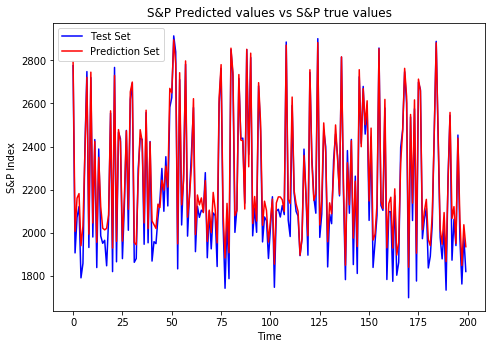

In [21]:
fig = plt.figure()
ax = fig.add_axes([0.2,0.2,1,1])
ax.set_xlabel('Time')
ax.set_ylabel('S&P Index')
ax.set_title('S&P Predicted values vs S&P true values')
ax.plot(np.arange(200), un_norm_y_test[:200], c='b', label='Test Set')
ax.plot(np.arange(200), un_norm_preds[:200] , c='r', label='Prediction Set')

ax.legend(loc='best')

plt.show()

#### 8. Comment on the points where the prediction and true values mismatch most. Why you think these particular points were difficult to predict?

prices of stocks originally having low prices are over estimated by the nueral netwrok and the reason might be that our network detected a ceratin rate by which stock prices are increasing however, this rate was decrasing with stocks of low prices.

# Task 2

##### finding the company with highest correlation to SP500

In [5]:
corr = df.corr()['SP500']
print(corr[1:].max())
print(corr['APH'])

0.9883608178608217
0.9883608178608217


##### creae a new data frame of the mentioned format (using for loop)

In [7]:
df = pd.read_csv('sp500.csv',index_col=0)
stock = df['APH']
new_df = pd.DataFrame(columns=['t-4','t-3','t-2','t-1','t','t+1','t+2','t+3','t+4'])
count = 0

for i in range(stock.shape[0]-8):
    x = np.array(stock[count:count+5])
    y = np.array(stock[count+5:count+9])
    z = np.append(x,y)
    new_df.loc[i] = z
    count += 1
        
new_df.head()

,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4
0,36.2702,35.8013,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106
1,35.8013,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896
2,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943
3,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943,39.2269
4,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943,39.2269,39.0212


###### creae a new data frame of the mentioned format (using pandas shift)

In [31]:
t_4 = stock.shift(4)
t_3 = stock.shift(3)
t_2 = stock.shift(2)
t_1 = stock.shift(1)
t = stock
input_cols = pd.concat([t_4, t_3, t_2, t_1, t], axis=1).dropna()

t1 = stock.shift(-1)
t2 = stock.shift(-2)
t3 = stock.shift(-3)
t4 = stock.shift(-4)

output_cols = pd.concat([t1, t2, t3, t4], axis=1).dropna()

new_df = pd.concat([input_cols,output_cols], axis=1).dropna()
new_df.columns = ['t-4','t-3','t-2','t-1','t','t+1','t+2','t+3','t+4']
new_df.head()

,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4
4,36.2702,35.8013,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106
5,35.8013,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896
6,36.2127,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943
7,36.4472,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943,39.2269
8,36.8634,36.8873,37.0548,37.8203,38.8106,39.3896,39.3943,39.2269,39.0212


###### Divide the dataset into training, testing sets

In [7]:
x = new_df.iloc[:,0:5]
y = new_df.iloc[:,5:9]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)


#### 1. Indicate the scoring metric suitable for this task.

r2 scoring metrics is the most suitable for this task because it provides a measure of how well future samples are likely to be predicted by the model. 

In [54]:
mlp = MLPRegressor()
mlp.fit(X_train, Y_train)  
preds = mlp.predict(X_test)
metrics.r2_score(Y_test, preds)
# r2 best possible score is 1.0

0.9885808146125261

#### 2.Indicate the neural network architecture and configuration that achieve the best score. 

In [56]:

clf = MLPRegressor(solver='adam', learning_rate_init=0.01)
clf.fit(X_train, Y_train)  
print(abs(cross_val_score(clf, X_train, Y_train, cv=3, scoring='neg_mean_absolute_error'))) 

preds = clf.predict(X_test)
metrics.r2_score(Y_test, preds)


[0.86176525 0.91450491 0.92148468]


0.9952092395427429

#### 3. Use the trained neural network to predict stock price for 3 instances from the test set.

In [46]:
inst_y_test = np.array(Y_test[:3])
print(y_test)
print()
inst_preds = preds[:3]
print (inst_preds.reshape(3,4))

[[55.2159 55.3611 55.8063 56.0192]
 [68.2958 68.3745 68.4926 68.7289]
 [90.5851 87.7391 84.913  86.6644]]

[[55.41123835 55.8406205  55.67056366 55.76005036]
 [67.20534997 67.72181333 67.56140936 67.67226096]
 [90.35642674 91.19852303 90.78789413 90.8301745 ]]


#### Display the output value versus the predicted value and justify the similarities and differences in values.

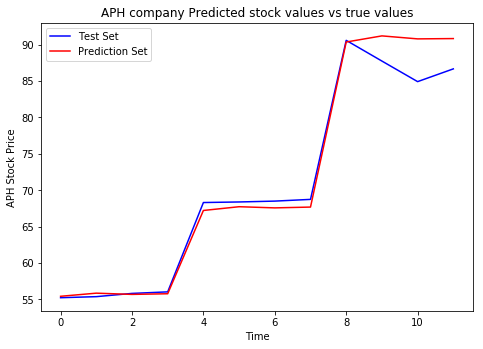

In [50]:
fig = plt.figure()
ax = fig.add_axes([0.2,0.2,1,1])
ax.set_xlabel('Time')
ax.set_ylabel('APH Stock Price')
ax.set_title('APH company Predicted stock prices vs true prices')
ax.plot(np.arange(12), inst_y_test.flatten() , c='b', label='Test Set')
ax.plot(np.arange(12), inst_preds.flatten() , c='r', label='Prediction Set')

ax.legend(loc='best')

plt.show()

In [ ]:
# output
# 55.2159  55.3611  55.8063  56.0192
# 68.2958  68.3745  68.4926  68.7289
# 90.5851  87.7391  84.9130  86.6644

# predections
#  '55.58' '55.90' '55.81' '56.11'
#  '67.64' '67.80' '67.73' '68.13'
#  '91.07' '91.35' '91.20' '91.86'

#  5 stock prices out of 12 are accuratly predectied 
#  4 stock prices out of 12 we over estomated by almost 1$
#  while the other 3 prices where over estimated by a range of 4-5 $ 
#  but the overall prediction is considered precised and very close to the true values
